In [6]:
import matplotlib.pyplot as plt
import numpy as np

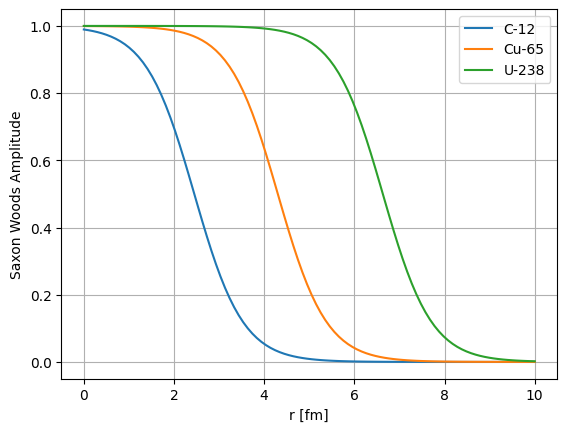

In [7]:
#Saxon Wood Potential
# plt.rc('text', usetex = True)

def sax(r, A):
    p0 = 1.0
    a = 1.07 * A**(1.0/3.0)
    d = 0.54
    p = p0/(1.0+np.exp((r-a)/d))
    return p
    
x = np.linspace(0.0,10.0,100)

plt.plot(x, sax(x, A=12), label="C-12")
plt.plot(x, sax(x, A=65), label="Cu-65")
plt.plot(x, sax(x, A=238), label="U-238")
plt.xlabel("r [fm]")
plt.ylabel("Saxon Woods Amplitude")
plt.legend()
plt.grid()
plt.savefig('figures/saxton_woods.png')
plt.show()

/var/folders/cd/cqgcr8f52t12fwclvgk0l0fm0000gn/T/ipykernel_91666/4041392879.py:13: RuntimeWarning: divide by zero encountered in divide
  return  (z*z*Z*Z*alpha*alpha*hbar*hbar*c*c/(4*E*E)) * (1.0/sinv)


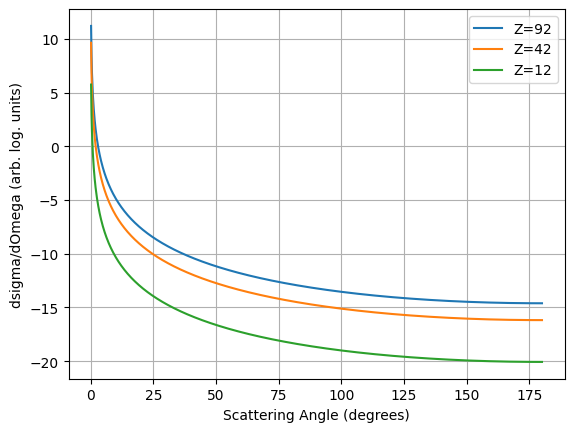

In [8]:
# Rutherford Scattering

z = 2
Z = 79
alpha= 1.0/137.0
E = 5.4
hbar=1.05E-34
c =3E8
def sigma(theta):
    # (z*z*Z*Z*alpha*alpha*hbar*hbar*c*c/(4*E*E)) *
    sint = np.sin(theta/2.0)
    sinv = sint*sint*sint*sint
    return  (z*z*Z*Z*alpha*alpha*hbar*hbar*c*c/(4*E*E)) * (1.0/sinv)


x = np.linspace(0.0,3.14159,1000)
y = sigma(x)

Z = 92
plt.plot(180.0*x/3.141519,np.log(sigma(x))+107.0, label="Z=92")

Z = 42
plt.plot(180.0*x/3.141519,np.log(sigma(x))+107.0, label="Z=42")

Z = 6
plt.plot(180.0*x/3.141519,np.log(sigma(x))+107.0, label="Z=12")


plt.ylabel("dsigma/dOmega (arb. log. units)")
plt.xlabel("Scattering Angle (degrees)")
plt.legend()
plt.grid()
plt.savefig('figures/rutherford_form.png')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Index(['z', 'n', 'symbol', 'radius', 'unc_r', 'abundance', 'unc_a',
       'energy_shift', 'energy', 'unc_e', 'ripl_shift', 'jp', 'half_life',
       'operator_hl', 'unc_hl', 'unit_hl', 'half_life_sec', 'unc_hls',
       'decay_1', 'decay_1_%', 'unc_1', 'decay_2', 'decay_2_%', 'unc_2',
       'decay_3', 'decay_3_%', 'unc_3', 'isospin', 'magnetic_dipole', 'unc_md',
       'electric_quadrupole', 'unc_eq', 'qbm', 'unc_qb', 'qbm_n', 'unc_qbmn',
       'qa', 'unc_qa', 'qec', 'unc_qec', 'sn', 'unc_sn', 'sp', 'unc_sp',
       'binding', 'unc_ba', 'atomic_mass', 'unc_am', 'massexcess', 'unc_me',
       'me_systematics', 'discovery', 'ENSDFpublicationcut-off',
       'ENSDFauthors', 'Extraction_date'],
      dtype='object')
       a  abundance    binding   z    n
0      1    99.9855     0.0000   1    0
1      4    99.9998  7073.9156   2    2
2      7    95.1500  5606.4401   3    4
3      9   100.0000  6462.6693   4    5
4     10    19.6500  6475.0835   5    5
..   ...        ...        ...  .. 

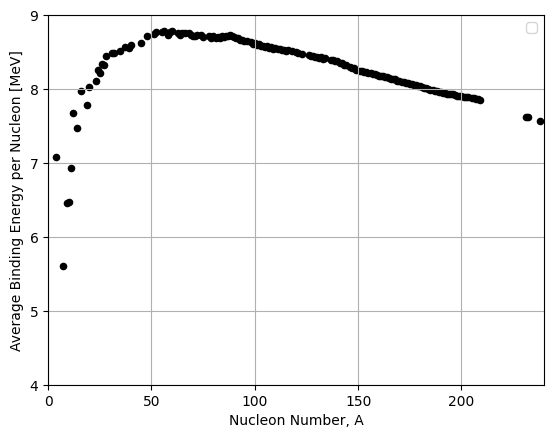

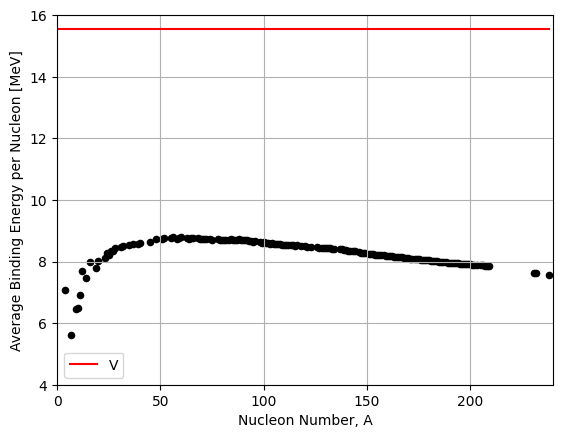

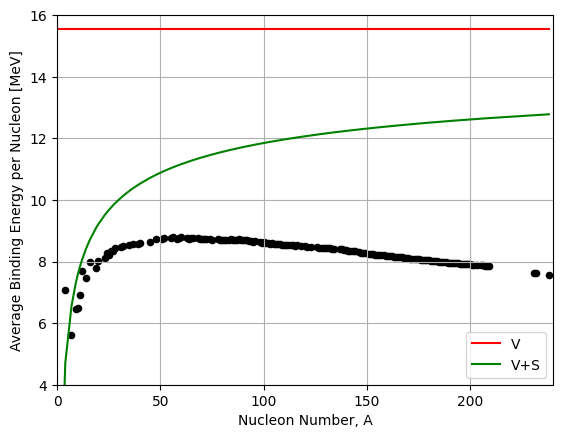

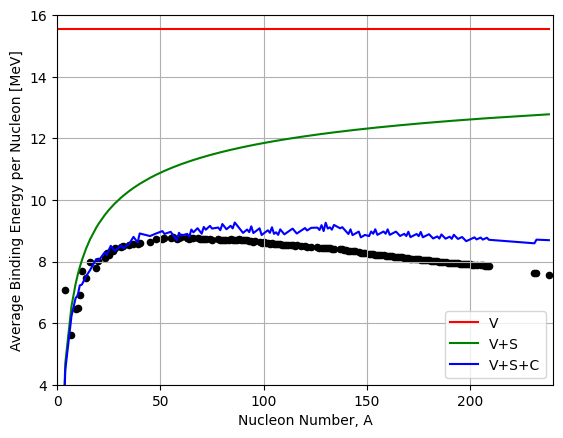

[1 0 1 1 2 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0]


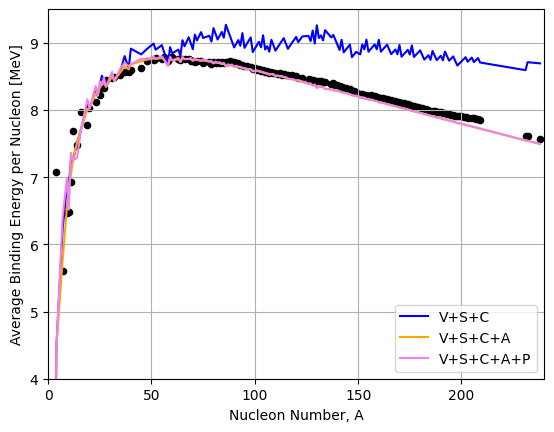

[1 0 1 1 2 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0]


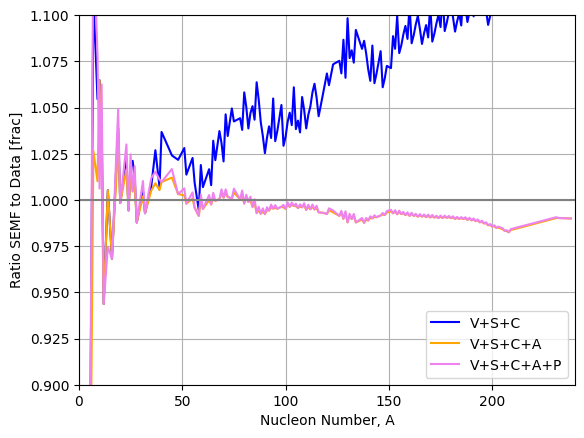

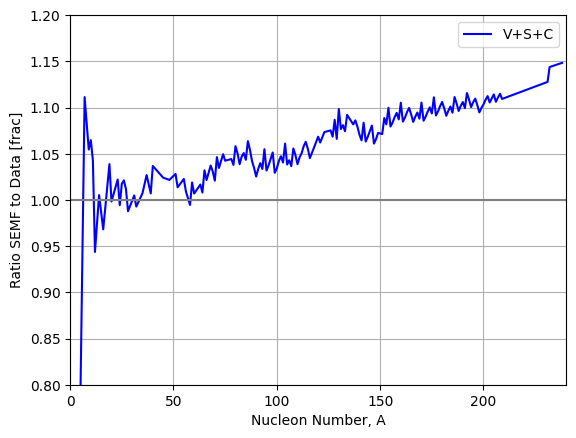

In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

# load data into a dataframe 
df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
df = df[pd.to_numeric(df['abundance'],errors='coerce').notna()] # remove blanks (unknown intensities)
# df.intensity = df['intensity'].astype(float) # convert to numeric. Note how one can specify the field by attribute or by string 

print(df.columns)

df["a"] = df.z + df.n
df = df[df.abundance > 10]
df["binding"] = df.binding
df = df[["a","abundance","binding", "z","n"]]
df = df.loc[df.groupby('a').binding.idxmax()].reset_index(drop=True)

# plt.plot(df.a, df.binding/1e3, c='gray')


print(df)

def volume(A):
    return 15.56 * A

def surface(A):
    return -17.23 * A**(2.0/3.0)

def coulomb(A,Z):
    return -0.72*Z*(Z-1) / A**(1.0/3.0)

def assym(A,Z):
    p_aa = 93.14
    B_a=-p_aa*(Z-A/2)**2/A
    return B_a

def pair(A,Z):
    p_ap=12.0
    B_p=-p_ap/A**(1/2) 
    N=A-Z
    
    CV = np.array(Z%2 + N%2)
    B_p = np.array(B_p)
    print(CV)
    B_p[ CV == 1 ] = -B_p[ CV == 1 ]
    B_p[ CV == 0 ] = 0

    return B_p



plt.scatter(df.a, df.binding/1e3, s=20, c='black')
plt.xlim([0.0,240.0])
plt.ylim([4.0,9.0])
# plt.plot( df.a, volume(df.a)/df.a, label="V", c='red')
# plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a, label="V+S", c='green')
# plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C", c='blue')
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A")
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A+P")

plt.grid()
plt.legend()
plt.xlabel("Nucleon Number, A")
plt.ylabel("Average Binding Energy per Nucleon [MeV]")
plt.savefig("figures/semf_goodness_dataonly.png")
plt.show()


plt.scatter(df.a, df.binding/1e3, s=20, c='black')
plt.xlim([0.0,240.0])
plt.ylim([4.0,16.0])
plt.plot( df.a, volume(df.a)/df.a, label="V", c='red')
# plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a, label="V+S", c='green')
# plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C", c='blue')
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A")
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A+P")

plt.grid()
plt.legend()
plt.xlabel("Nucleon Number, A")
plt.ylabel("Average Binding Energy per Nucleon [MeV]")
plt.savefig("figures/semf_goodness_uptovol.png")
plt.show()

plt.scatter(df.a, df.binding/1e3, s=20, c='black')
plt.xlim([0.0,240.0])
plt.ylim([4.0,16.0])
plt.plot( df.a, volume(df.a)/df.a, label="V", c='red')
plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a, label="V+S", c='green')
# plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V", c='blue')
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A")
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A+P")

plt.grid()
plt.legend()
plt.xlabel("Nucleon Number, A")
plt.ylabel("Average Binding Energy per Nucleon [MeV]")
plt.savefig("figures/semf_goodness_uptosurf.png")
plt.show()

plt.scatter(df.a, df.binding/1e3, s=20, c='black')
plt.xlim([0.0,240.0])
plt.ylim([4.0,16.0])
plt.plot( df.a, volume(df.a)/df.a, label="V", c='red')
plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a, label="V+S", c='green')
plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C", c='blue')
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A")
# plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A+P")

plt.grid()
plt.legend()
plt.xlabel("Nucleon Number, A")
plt.ylabel("Average Binding Energy per Nucleon [MeV]")
plt.savefig("figures/semf_goodness_uptocoul.png")
plt.show()


plt.scatter(df.a, df.binding/1e3, s=20, c='black')
plt.xlim([0.0,240.0])
plt.ylim([4.0,9.5])
# plt.plot( df.a, volume(df.a)/df.a, label="V")
# plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a, label="V+S")
plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C", c='blue')
plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A", c='orange')
plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a, label="V+S+C+A+P", c='violet')
plt.grid()
plt.xlabel("Nucleon Number, A")
plt.ylabel("Average Binding Energy per Nucleon [MeV]")

plt.legend()
plt.savefig("figures/semf_goodness_withpairing.png")
plt.show()


# plt.plot( df.a, volume(df.a)/df.a/df.binding/1E-3)
# plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a/df.binding/1E-3)
plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a/df.binding/1E-3,  label="V+S+C", c='blue')
plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a/df.binding/1E-3, label="V+S+C+A", c='orange')
plt.plot( df.a, (volume(df.a)+assym(df.a, df.z) + pair(df.a, df.z) + coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a/df.binding/1E-3, label="V+S+C+A+P", c='violet')
plt.plot( [0.0,240.0], [1.0,1.0], c='gray')
plt.xlabel("Nucleon Number, A")
plt.ylabel("Ratio SEMF to Data [frac]")
plt.ylim([0.9,1.1])
plt.xlim([0.0,240.0])
plt.legend()
plt.grid()
plt.savefig("figures/semf_goodness_withpairing_ratio.png")
plt.show()


# plt.plot( df.a, volume(df.a)/df.a/df.binding/1E-3)
# plt.plot( df.a, (volume(df.a)+surface(df.a))/df.a/df.binding/1E-3)
plt.plot( df.a, (volume(df.a)+ coulomb(df.a, Z=np.array(df.z)) + surface(df.a))/df.a/df.binding/1E-3,  label="V+S+C", c='blue')
plt.plot( [0.0,240.0], [1.0,1.0], c='gray')
plt.xlabel("Nucleon Number, A")
plt.ylabel("Ratio SEMF to Data [frac]")
plt.ylim([0.8,1.2])
plt.xlim([0.0,240.0])
plt.legend()
plt.grid()
plt.savefig("figures/semf_goodness_simple_ratio.png")
plt.show()





z
n
symbol
radius
unc_r
abundance
unc_a
energy_shift
energy
unc_e
ripl_shift
jp
half_life
operator_hl
unc_hl
unit_hl
half_life_sec
unc_hls
decay_1
decay_1_%
unc_1
decay_2
decay_2_%
unc_2
decay_3
decay_3_%
unc_3
isospin
magnetic_dipole
unc_md
electric_quadrupole
unc_eq
qbm
unc_qb
qbm_n
unc_qbmn
qa
unc_qa
qec
unc_qec
sn
unc_sn
sp
unc_sp
binding
unc_ba
atomic_mass
unc_am
massexcess
unc_me
me_systematics
discovery
ENSDFpublicationcut-off
ENSDFauthors
Extraction_date


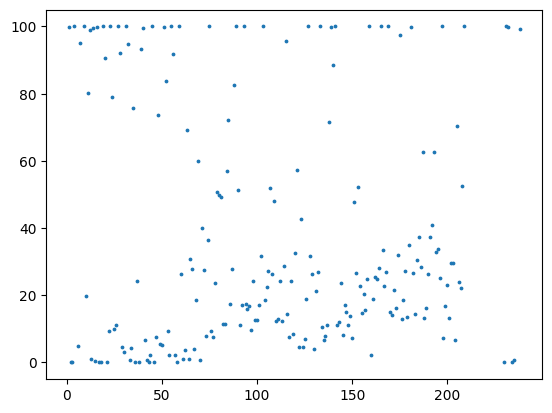

In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# the service URL
livechart = "https://nds.iaea.org/relnsd/v0/data?"

# There have been cases in which the service returns an HTTP Error 403: Forbidden
# use this workaround
import urllib.request
def lc_pd_dataframe(url):
    req = urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
    return pd.read_csv(urllib.request.urlopen(req))

# load data into a dataframe 
df = lc_pd_dataframe(livechart + "fields=ground_states&nuclides=all")
for key in df:
    print(key)

df = df[pd.to_numeric(df['abundance'],errors='coerce').notna()] # remove blanks (unknown intensities)

df["a"] = df.z + df.n
df["binding"] = df.binding
df = df[["a","abundance","binding", "z","n"]]
df = df.loc[df.groupby('a').binding.idxmax()].reset_index(drop=True)

plt.scatter(df.a, df.abundance, s=3)
plt.show()
